# Symbolic Quantum computation

- Question me and Pranav asked during the ground level design of SuperstaQ in early 2021: "What would Mathematica for quantum computing look like?" 
- Question was never brought up again, until now!
- Wolfram research creates [quantum computing package](https://community.wolfram.com/groups/-/m/t/2416125) in late 2021: 
     * Problem: Mathematica is not Open Source and it's not in Python which is the most poplar language for the most popular quantum computing packages
     * Solution: [Sympy: a Python library for symbolic mathematics](https://www.sympy.org/en/index.html)
     * Problem: Sympy's quantum computation library is not as well developed as Wolfram
     * Solution: Improve Sympy's quantum computation capabilities




Why Symbolic Quantum computation? Because you can't represent a general quantum state like the one below in Cirq or Qiskit. When you read Nielsen and Chuang you're mostly doing Symbolic manipulations

In [22]:
import sympy
from sympy.physics.quantum.qubit import Qubit

alpha, beta = sympy.symbols("α, β")
psi = alpha * Qubit(0) + beta * Qubit(1)
psi

α*|0> + β*|1>

MVP: State evolution calculator

In [23]:
import cirq
import superstaq as ss

In [24]:
theta = sympy.Symbol("theta")
x = sympy.Symbol("x")
qubits = cirq.LineQubit.range(3)


c2 = cirq.Circuit(cirq.X(qubits[0]), cirq.CNOT(qubits[0], qubits[1]), cirq.Y(qubits[0]) ** theta)
print(c2)

0: ───X───@───Y^theta───
          │
1: ───────X─────────────


In [25]:
ss.print_state_evolution(c2)

Initial state: |00>
Operation: X(q(0)) - Statevector: |01>
Operation: CNOT(q(0), q(1)) - Statevector: |11>
Operation: Y**theta(q(0)) - Statevector: -sin(theta/2)*|10> + cos(theta/2)*|11>


In [26]:
circuit = cirq.Circuit(
    cirq.H(qubits[0]), cirq.CNOT(qubits[0], qubits[1]), cirq.H(qubits[0]), cirq.measure(qubits[0])
)

In [27]:
ss.state_probabilites(circuit)

[(|00>, 1/4), (|01>, 1/4), (|10>, 1/4), (|11>, 1/4)]

In [28]:
ss.print_state_evolution_pretty(circuit)

|00>

Operation: H(q(0))


sqrt(2)*|00>/2 + sqrt(2)*|01>/2

Operation: CNOT(q(0), q(1))


sqrt(2)*|00>/2 + sqrt(2)*|11>/2

Operation: H(q(0))


|00>/2 + |01>/2 + |10>/2 - |11>/2

Operation: cirq.MeasurementGate(1, cirq.MeasurementKey(name='q(0)'), ())(q(0))


|10>

# Future Work
- Symbols as input: 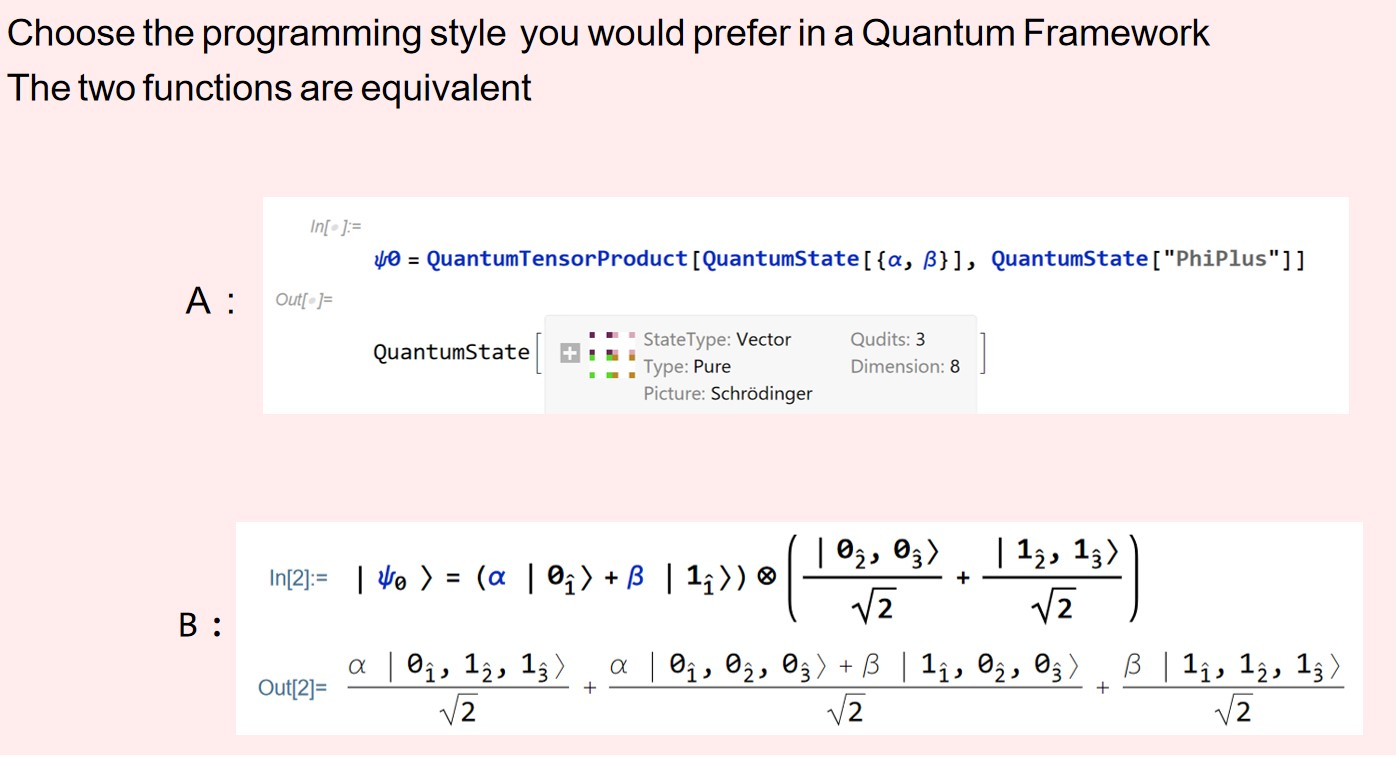
Image reference: https://community.wolfram.com/groups/-/m/t/2429752

- Implement algorithms
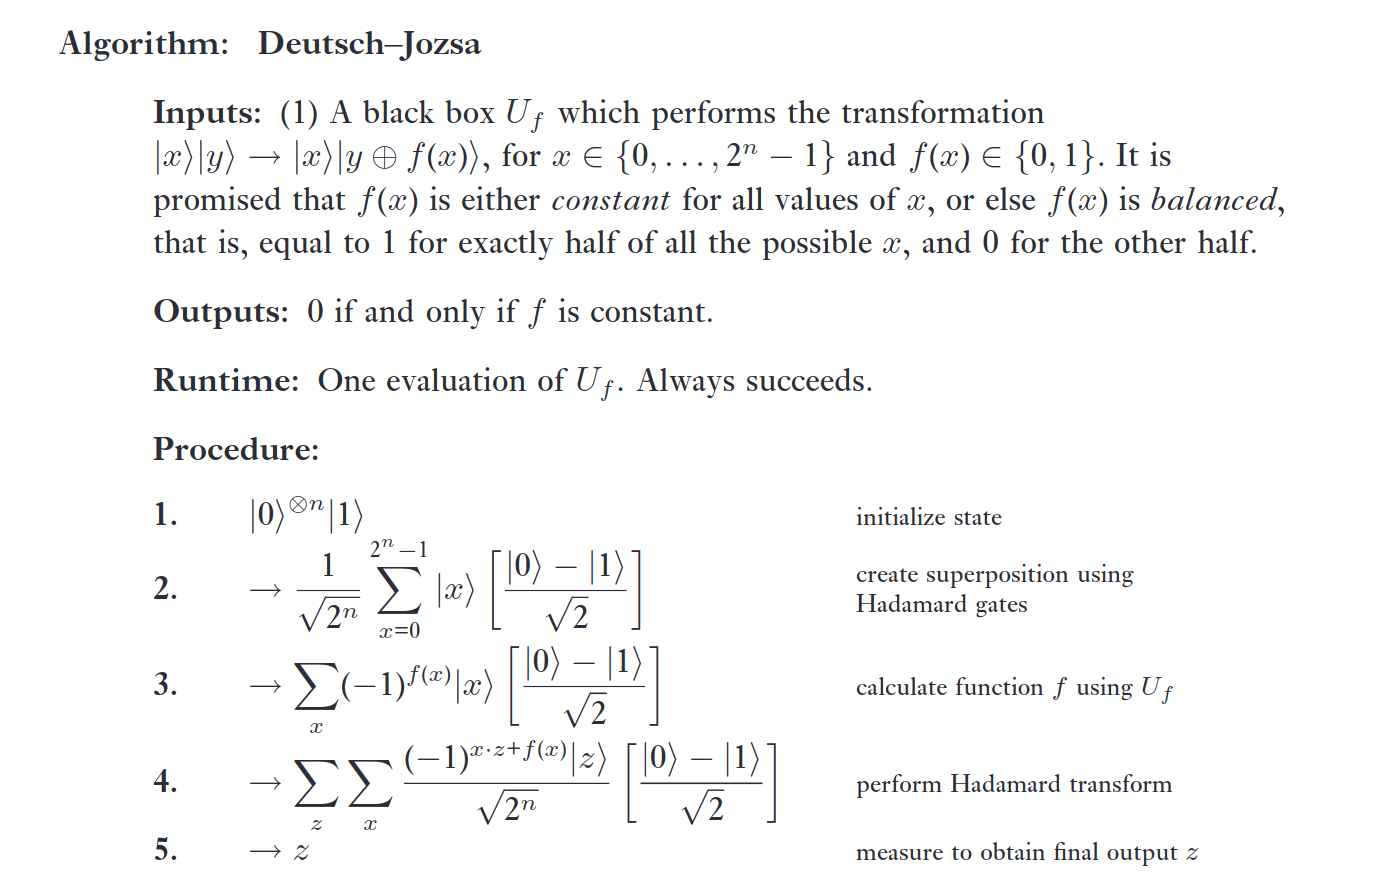
Image Reference: Nielsen and Chuang (2010)
